# COLLATZ CONJECTURE 


                                                    GROUP 1 MEMBERS

1. Abdalah Issa Namwenje
2. Wycliffe Miyogo Makori
3. Tabitha Masha Mwikali
4. Valentine
5. Christian 

                                                    PROBLEM STATEMENT 

Let us play a number game. Think of any positive integer $(n)$, there are two rules governing our game. 
- If $n$ is even, divide it by $2$
- If $n$ is odd, multiply it by $3$, then add $1$ 

Take a resulting number and follow the rules over and over.\
Observe the final number as your output.  


# EXPERIMENTATION AND OBSERVATIONS

                                                   
1. Are the observed numbers end to $1$?\
   Yes, all numbers we observed from $2$ to $1000000$ ended to $1$.

In [37]:
@interact
def collatz_graph_animated(starting_number=(2, 50)):
    n = starting_number
    sequence = [n]

    # Compute the full sequence
    while n > 1:
        if n % 2 == 0:
            n = n // 2
        else:
            n = 3 * n + 1
        sequence.append(n)
    
    print(f"Collatz sequence starting from {starting_number}:")
    print(sequence)

    # Create the animation
    frames = []
    for step in range(1, len(sequence) + 1):  # Incrementally show the sequence
        partial_sequence = sequence[:step]
        frame = list_plot(
            [(i, partial_sequence[i]) for i in range(len(partial_sequence))],
            plotjoined=True,
            marker="o",
            color="blue",
            axes_labels=["Steps", "Value"],
            gridlines=True,
            title=f"Collatz Conjecture (Start: {starting_number})",
            figsize=[10, 5]
        )
        frames.append(frame)

    # Animate the frames
    animation = animate(frames, figsize=[10, 5])
    show(animation)


Interactive function <function collatz_graph_animated at 0x7f946bb10a40> with 1 widget
  starting_number: IntSlider(value=26, description='starting_number', max=50, min=2)

Moreover these numbers are inteconnected. 

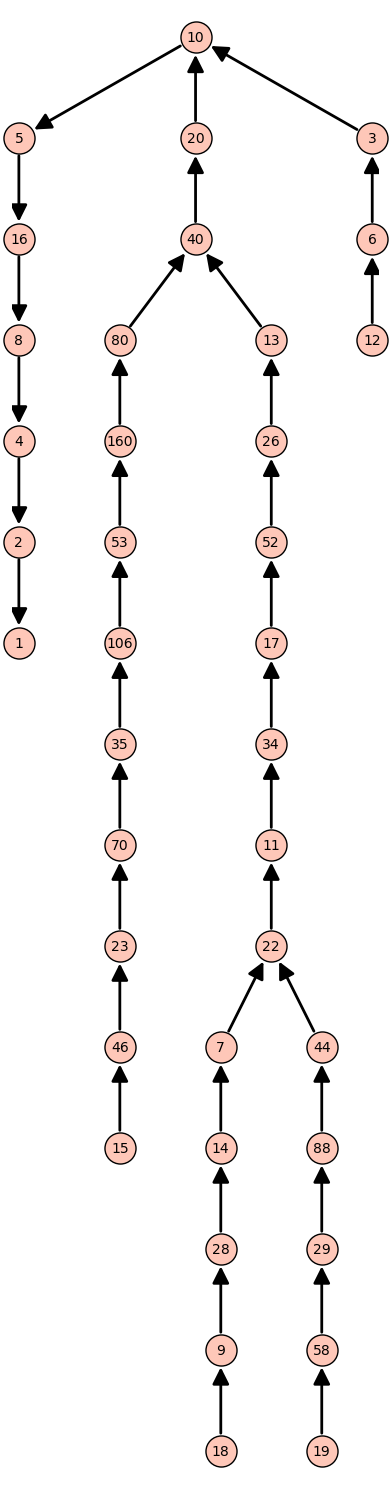

In [38]:
# Create the Collatz graph
V = [i for i in range(1, 20)]  # Define vertices from 1 to limit
D = DiGraph([])  # Initialize an empty directed graph
D.add_vertices(V)

# Function to generate Collatz sequences and add to the graph
def Collatz(D, v):
    while v != 1:
        if v % 2 == 0:  # Even case
            a = v // 2
        else:  # Odd case
            a = 3 * v + 1
        
        # Add vertex and edge to the graph
        if a not in D.vertices():
            D.add_vertex(a)
        D.add_edge(v, a)
        
        # Move to the next value in the Collatz sequence
        v = a

# Apply the Collatz function for all numbers from 2 to 25
for i in range(2, 20):
    Collatz(D, i)

# Set layout and visualization options
D.set_latex_options(graphic_size=(5, 5))  # Adjust graph size for clarity
D.set_pos(D.layout(layout='tree'))  # Use tree layout for better visualization

# Display the graph
D.show(figsize=[10, 15], vertex_size=500, vertex_labels=True)  # No edge_style needed



## Observation 2

Is there any pattern  for a number of steps taken by a number on its way to $1$?

From $2$ to $100$, only $16$ numbers $(27,31,41,47,54,55,62,63,71,73,82,83,91,94,95,97)$ take around $100$ steps to get to $1$ while the rest take less than $40$.
No numbers take $40$ to $90$ steps to get to $1$. However the pattern changes as $n$ grows

Do we have any bound for the number of steps?

As the size of the number $n$ increase, the number of steps also increase. This might imply as we to infinity we might not find a bound for the number of steps.

In [39]:
@interact
def collatz_steps_graph(max_starting_number=(2, 100)):

    starting_numbers = list(range(2, max_starting_number + 1))
    step_counts = []

    for n in starting_numbers:
        steps = 0
        while n > 1:
            if n % 2 == 0:
                n = n // 2
            else:
                n = 3 * n + 1
            steps += 1
        step_counts.append(steps)

   
    plot_steps = list_plot(
        [(starting_numbers[i], step_counts[i]) for i in range(len(starting_numbers))],
        marker="o",   
        color="green",
        title=f"Collatz Conjecture: Steps to Reach 1",
        axes_labels=["Starting Number", "Steps"],
        gridlines=True
    )

    show(plot_steps)

Interactive function <function collatz_steps_graph at 0x7f946b8cc900> with 1 widget
  max_starting_number: IntSlider(value=51, description='max_starting_number', min=2)


As the bound of numbers increase we can see the change of pattern massively.


In [40]:
from sage.all import *

@interact
def collatz_steps_graph(max_starting_number=(2, 100)):
    
    # List of starting numbers from 2 up to the max starting number
    starting_numbers = list(range(2, max_starting_number + 1))
    step_counts = []

    # Calculate the number of steps for each starting number
    for n in starting_numbers:
        steps = 0
        while n > 1:
            if n % 2 == 0:
                n = n // 2
            else:
                n = 3 * n + 1
            steps += 1
        step_counts.append(steps)

    # Group the step counts into three categories
    group_1 = sum(1 for steps in step_counts if steps <= 50)
    group_2 = sum(1 for steps in step_counts if 51 <= steps <= 100)
    group_3 = sum(1 for steps in step_counts if steps > 100)

    groups = ["1-50 Steps", "51-100 Steps", "101+ Steps"]
    counts = [group_1, group_2, group_3]

    # Creating a bar chart with the counts
    histogram = bar_chart(
        counts,   # Use the counts for the bars
        color="skyblue", 
        title=f"Distribution of Collatz Steps (Max Starting Number: {max_starting_number})", 
        axes_labels=["Step Groups", "Counts"],
        ticks=[[], None]  # Remove horizontal scale (x-axis ticks)
    )

    # Add text annotations above each bar using the text method
    for i, count in enumerate(counts):
        histogram += text(str(count), (i, count + 1), color="black", fontsize=10)

    # Add labels to the x-axis manually (since we removed the scale)
    label_1 = text(r"$(1-50]$", (0, -0.1))
    label_2 = text(r"$(51 - 100]$", (1, -0.1))
    label_3 = text(r"$(101+]$", (2, -0.1))

    # Show the chart with annotations and labels
    (histogram + label_1 + label_2 + label_3).show()


Interactive function <function collatz_steps_graph at 0x7f946b32ee80> with 1 widget
  max_starting_number: IntSlider(value=51, description='max_starting_number', min=2)

## Observation 3

What is the distribution of convergence path  of every number from the observation.\
From $2$ to $101$, $90$% of numbers converge at $16$. From $2$ to $1001$, $93.4$% of numbers converge at $16$ More observations showed that as n goes to infinity, around 94% of the numbers converge at 16

In [44]:
from sage.all import *

@interact
def collatz_distribution(starting_number=(2, 1000001)):
    
    # Initialize variables for tracking convergence points and their frequencies
    convergence_counts = {}

    # Loop through starting numbers from 2 to `starting_number`
    for n in range(2, starting_number + 1):
        sequence = [n]
        
        while n > 1:
            if n % 2 == 0:  # If the number is even
                n = n // 2
            else:  # If the number is odd
                n = 3 * n + 1
            sequence.append(n)

        # Check when the sequence converges to a power of 2
        for num in sequence:
            if (num & (num - 1)) == 0 and num > 0:  # This checks if `num` is a power of 2
                convergence_point = num
                break
        
        # Record the convergence point
        if convergence_point in convergence_counts:
            convergence_counts[convergence_point] += 1
        else:
            convergence_counts[convergence_point] = 1
    
    # Sort the convergence points and their frequencies for better readability
    sorted_convergence_points = sorted(convergence_counts.items())

    # Bin the data for grouping convergence points into the specified bins
    bins = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]
    bin_labels = [str(bin) for bin in bins] + ['More than 4096']

    # Initialize the counts for each bin
    bin_counts = {label: 0 for label in bin_labels}

    # Bin the convergence points
    for point, count in sorted_convergence_points:
        if point <= 4096:
            for i in range(len(bins)):
                if point <= bins[i]:
                    bin_counts[bin_labels[i]] += count
                    break
        else:
            bin_counts['More than 4096'] += count

    # Separate the data for plotting
    binned_labels = list(bin_counts.keys())
    binned_counts = list(bin_counts.values())

    # Create a bar chart to visualize the distribution of convergence points in bins
    histogram = bar_chart(
        binned_counts,  # Use the binned counts for the bars
        color="skyblue", 
        title=f"Distribution of Collatz Convergence Points (Up to {starting_number})", 
        axes_labels=["Convergence Point Bin", "Count"],
        ticks=[[], None]
    )

    # Add text annotations above each bar (the counts)
    for i, count in enumerate(binned_counts):
        histogram += text(str(count), (i, count + 1), color="black", fontsize=10)

    # Remove the percentage annotations below the bars
    # The following loop and code that adds percentages have been removed as requested

    label_1 = text(r"$(2)$", (0, -0.1))
    label_2 = text(r"$(4)$", (1, -0.1))
    label_3 = text(r"$(8)$", (2, -0.1))
    label_4 = text(r"$(16)$", (3, -0.1))
    label_5 = text(r"$(32)$", (4, -0.1))
    label_6 = text(r"$(64)$", (5, -0.1))
    label_7 = text(r"$(128)$", (6, -0.1))
    label_8 = text(r"$(256)$", (7, -0.1))
    label_9 = text(r"$(512)$", (8, -0.1))
    label_10 = text(r"$(1024)$", (9, -0.1))
    label_11 = text(r"$(2048)$", (10, -0.1))
    label_12 = text(r"$(4096)$", (11, -0.1))
    label_13 = text(r"$(>4096)$", (12, -0.1))
    # Show the chart with annotations and labels
    (histogram + label_1 + label_2 + label_3 + label_4 + label_5 + label_6 + label_7 + label_8 + label_9+label_10 + label_11 + label_12 + label_13).show()

  

Interactive function <function collatz_distribution at 0x7f946b632b60> with 1 widget
  starting_number: IntSlider(value=500001, description='starting_number', max=1000001, min=2)

**Observation 4**

What is the distribution of the leading digit in all sequences ?
The distribution of the first digit in sequences taken by the number follow the Benford law, which states the probability of a a leading digit in a  given data sets which are not bound to conditions follow the probability that is $log(1+1/d)$ instead of uniformity implying digits with smaller value appears frequently than the ones with larger value.

In [46]:
from sage.all import *

@interact
def collatz_first_digit_distribution(limit=(2, 100000)):
    # Initialize a dictionary to store the count of first digits
    first_digit_counts = {i: 0 for i in range(1, 10)}  

    # Function to get the first digit of a number
    def first_digit(num):
        return int(str(num)[0])  # Convert number to string, take first digit, convert back to int

    # Loop over all starting numbers from 2 to `limit`
    for starting_number in range(2, limit + 1):
        n = starting_number
        while n > 1:
            # Get the first digit of the current number and update the count
            digit = first_digit(n)
            if 1 <= digit <= 9:
                first_digit_counts[digit] += 1

            # Generate next number in the Collatz sequence
            if n % 2 == 0:  
                n = n // 2
            else:  
                n = 3 * n + 1

        # After the loop, when n becomes 1, count the first digit of 1
        first_digit_counts[1] += 1

    # Get the total number of first digits counted
    total_counts = sum(first_digit_counts.values())

    # Calculate the percentages for each first digit
    percentages = {digit: float(count) / total_counts * 100 for digit, count in first_digit_counts.items()}

    # Get the data for the histogram
    digits = list(first_digit_counts.keys())
    counts = list(first_digit_counts.values())
    percent_labels = [f"{percentages[digit]:.2f}%" for digit in digits]  # Ensure float conversion

    # Create the histogram showing counts
    histogram = bar_chart(
        counts,  
        color="skyblue", 
        title=f"First Digit Distribution in Collatz Sequences (2 to {limit})", 
        axes_labels=["First Digit", "Count"],
        ticks=[[], None] ,
        width=0.5  # Bar width
    )

    # Add percentage text annotations above each bar
    for i, count in enumerate(counts):
        histogram += text(f"{percent_labels[i]}", (i, count + 1), color="black", fontsize=10)  # Added a little offset for clarity

    label_1 = text(r"$(1)$", (0, -0.1))
    label_2 = text(r"$(2)$", (1, -0.1))
    label_3 = text(r"$(3)$", (2, -0.1))
    label_4 = text(r"$(4)$", (3, -0.1))
    label_5 = text(r"$(5)$", (4, -0.1))
    label_6 = text(r"$(6)$", (5, -0.1))
    label_7 = text(r"$(7)$", (6, -0.1))
    label_8 = text(r"$(8)$", (7, -0.1))
    label_9 = text(r"$(9)$", (8, -0.1))

    # Show the chart with annotations and labels
    (histogram + label_1 + label_2 + label_3 + label_4 + label_5 + label_6 + label_7 + label_8 + label_9).show()


Interactive function <function collatz_first_digit_distribution at 0x7f9469829bc0> with 1 widget
  limit: IntSlider(value=50001, description='limit', max=100000, min=2)

In [47]:
benford=[]
for d in range(1,10):
    probability=log(1+1/d,10)
    benford.append(float(probability*100))
print(benford)

[30.102999566398115, 17.60912590556812, 12.49387366082999, 9.69100130080564, 7.91812460476248, 6.694678963061321, 5.799194697768672, 5.115252244738128, 4.575749056067514]


## Conclusion

In [7]:
float(dilog(10))

0.5363012873578628